## Data Analysis of Hourly High Stock Prices Collected on 05/02/2022

The list of the stocks whose pricing information grabbed is as follows:
- Facebook (FB)  
- Shopify (SHOP)  
- Beyond Meat (BYND)  
- Netflix (NFLX)  
- Pinterest (PINS)  
- Square (SQ)  
- The Trade Desk (TTD)  
- Okta (OKTA)  
- Snap (SNAP)  
- Datadog (DDOG)  

We start our analysis with importing the necessary libraries.

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
df = pd.read_csv('results.csv')

We have total of 80 rows, and 4 columns.  
Each row includes the ticker name, the highest hourly price, the subject hour and the datetime when the highest price occured for that hour.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      80 non-null     object 
 1   high_stock_price  80 non-null     float64
 2   hour              80 non-null     int64  
 3   datetime          80 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ KB


In [104]:
df.head()

,company_name,high_stock_price,hour,datetime
0,BYND,37.804901,9,2022-05-02 09:57:00.000
1,BYND,37.990002,10,2022-05-02 10:34:00.000
2,BYND,37.590000,11,2022-05-02 11:33:00.000
3,BYND,37.330002,12,2022-05-02 12:21:00.000
4,BYND,36.570000,13,2022-05-02 13:09:00.000


For the sake of this analysis, I'll round up all stock prices to 2 decimal places as seen below.

In [105]:
df = df.round(2)

In [106]:
df.head()

,company_name,high_stock_price,hour,datetime
0,BYND,37.80,9,2022-05-02 09:57:00.000
1,BYND,37.99,10,2022-05-02 10:34:00.000
2,BYND,37.59,11,2022-05-02 11:33:00.000
3,BYND,37.33,12,2022-05-02 12:21:00.000
4,BYND,36.57,13,2022-05-02 13:09:00.000


## 1) Highest Stock Price at the First Trading Hour (9:00 AM - 10:00 AM)

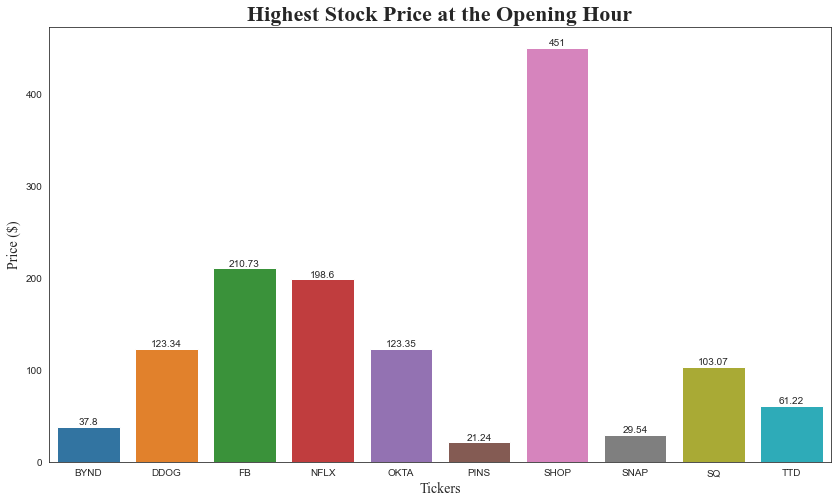

In [107]:
first_trading_hour = df[df['hour'] == 9]

fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

ax = sns.barplot(data = first_trading_hour,
    x='company_name', 
    y='high_stock_price')

ax.bar_label(ax.containers[0])

plt.xlabel('Tickers', fontfamily = "Times New Roman", size = 14)
plt.ylabel('Price ($)', fontfamily = "Times New Roman", size = 14)
plt.title("Highest Stock Price at the Opening Hour", fontfamily = "Times New Roman", size = 22, weight='bold')

plt.show()

We find that the highest hourly stock price at the opening hour (9:00am - 10:00am) belongs to SHOP, followed by FB and NFLX on 05/02/2022

## 2) Highest Hourly Stock Price Trend

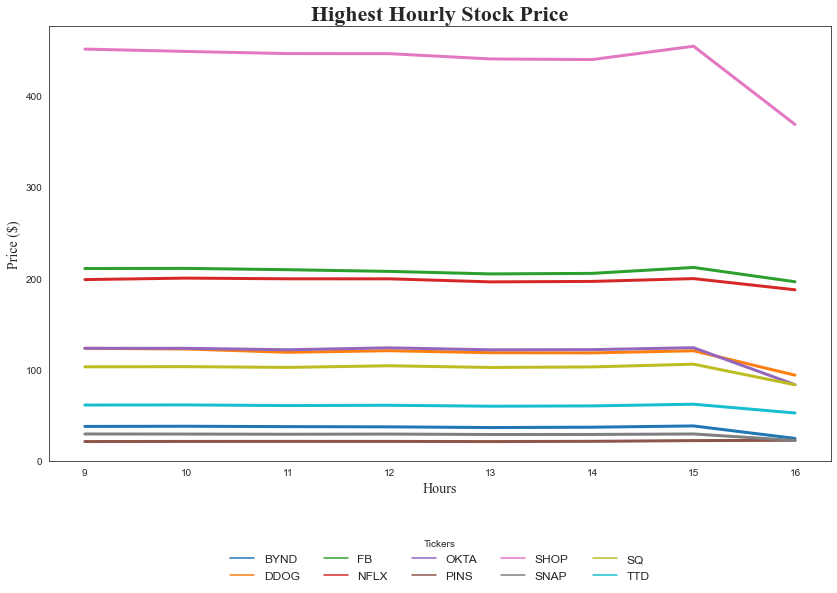

In [114]:
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

sns.lineplot(data = df,
    x='hour', 
    y='high_stock_price', 
    linewidth = 3, 
    ci=None, 
    hue='company_name')

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.3),
    ncol=5,
    title= 'Tickers' , 
    frameon=False,
    fontsize = 12
)

plt.xlabel('Hours', fontfamily = "Times New Roman", size = 14)
plt.ylabel('Price ($)', fontfamily = "Times New Roman", size = 14)
plt.title("Highest Hourly Stock Price", fontfamily = "Times New Roman", size = 22, weight='bold')

plt.show()

From the above graph, we can see that SHOP was priced much higher than the rest of selected stocks on 5/2/2022- valued around $480.

The second most expensive stock at that time was FB, followed by NFLX when both of them priced around $200.

Additionally, all hourly high stock prices were stagnant till 15:00, and then they gradually started to fall when it is about closing time of the day trading.

## 3) Comparison of Opening and Closing Prices

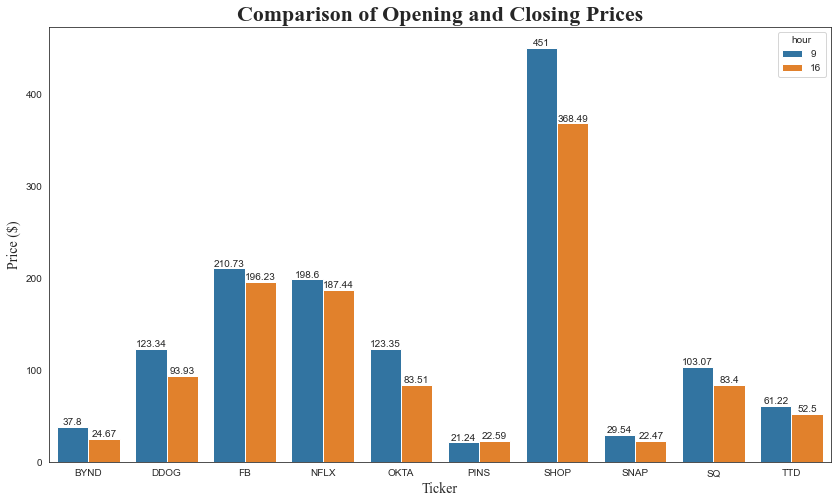

In [116]:
open_close = df[df['hour'].isin([9, 16])]

fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

ax = sns.barplot(data = open_close,
    x='company_name', 
    y='high_stock_price',
    hue=open_close['hour'])

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Ticker', fontfamily = "Times New Roman", size = 14)
plt.ylabel('Price ($)', fontfamily = "Times New Roman", size = 14)
plt.title("Comparison of Opening and Closing Prices", fontfamily = "Times New Roman", size = 22, weight='bold')

plt.show()

We can see that all of the stocks lost value at the closing hour except PINS

And although it seems like SHOP dropped the most compared with other stocks, this is not correct.

In fact, OKTA and BYND lost the most value with around %33 drop from their opening price, followed by DDOG losing %25 value and then SHOP with losing value around %18.

## 4) Average Highest Hourly Stock Price

In [117]:
avg_price = df.groupby('company_name').mean()['high_stock_price'].to_frame().reset_index()
print(avg_price)

  company_name  high_stock_price
0         BYND          35.90375
1         DDOG         117.13000
2           FB         207.11250
3         NFLX         197.18625
4         OKTA         117.92125
5         PINS          21.62250
6         SHOP         436.73250
7         SNAP          28.45625
8           SQ         100.96500
9          TTD          59.87875


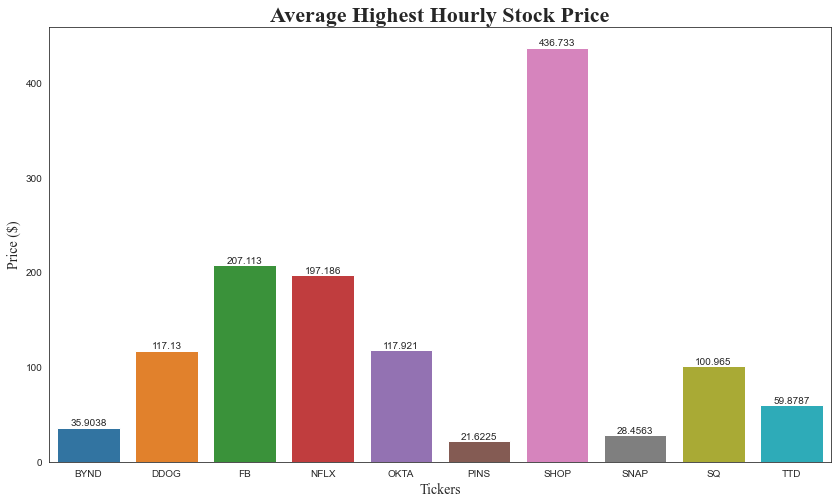

In [119]:
fig, ax = plt.subplots(figsize=(14,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

ax = sns.barplot(data = avg_price,
    x='company_name', 
    y='high_stock_price')

ax.bar_label(ax.containers[0])

plt.xlabel('Tickers', fontfamily = "Times New Roman", size = 14)
plt.ylabel('Price ($)', fontfamily = "Times New Roman", size = 14)
plt.title("Average Highest Hourly Stock Price", fontfamily = "Times New Roman", size = 22, weight='bold')

plt.show()

Similar to prior results, the highest avg hourly stock price again belongs to SHOP, followed by FB and NFLX.